In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp

print('TF version:', tf.__version__)
print('TFP version:', tfp.__version__)

TF version: 2.15.0
TFP version: 0.23.0


In [ ]:
from google.colab import files
insulatordata=files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
root_path = 'gdrive/MyDrive/Insulatordetection'

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras import utils as np_utils

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix

PATH = os.path.join(os.path.dirname(root_path), "Insulatordetection")
print(PATH)

gdrive/MyDrive/Insulatordetection


In [ ]:
train_def = os.path.join(PATH, 'Train/Defective')
train_nor = os.path.join(PATH, 'Train/Normal')
test_def = os.path.join(PATH, 'Test/Defective')
test_nor = os.path.join(PATH, 'Test/Normal')

In [ ]:
train_dir = os.path.join(PATH , 'Train')
test_dir = os.path.join(PATH , 'Test')

In [ ]:
batch_size = 132
epochs = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size, directory=test_dir, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')

Found 2358 images belonging to 2 classes.
Found 175 images belonging to 2 classes.


In [ ]:
train_def = os.path.join(PATH, 'Train/Defective')
train_nor = os.path.join(PATH, 'Train/Normal')
test_def = os.path.join(PATH, 'Test/Defective')
test_nor = os.path.join(PATH, 'Test/Normal')

num_def = len(os.listdir(train_def))
num_nor = len(os.listdir(train_nor))
total_train = num_def+ num_nor
print('total training Defective images:',num_def)
print('total training Normal images:',num_nor)

print("------------------------")
print("Total training images:", total_train)

tnum_def = len(os.listdir(test_def))
tnum_nor = len(os.listdir(test_nor))
total_test = tnum_def+ tnum_nor
print('total test Defective images:',tnum_def)
print('total test Normal images:',tnum_nor)

print("------------------------")
print("Total test images:", total_test)

total training Defective images: 1808
total training Normal images: 550
------------------------
Total training images: 2358
total test Defective images: 125
total test Normal images: 50
------------------------
Total test images: 175


# **Current Model**

In [ ]:
import tensorflow as tf
num_classes = 2

model = Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
custhistory = model.fit(
  train_data_gen,
  epochs=10,
  )

Epoch 1/10
19/19 [==============================] - 882s 45s/step - loss: 0.7979 - accuracy: 0.6217
Epoch 2/10
19/19 [==============================] - 138s 7s/step - loss: 0.5470 - accuracy: 0.4394
Epoch 3/10
19/19 [==============================] - 133s 7s/step - loss: 0.5427 - accuracy: 0.4907
Epoch 4/10
19/19 [==============================] - 135s 7s/step - loss: 0.5392 - accuracy: 0.4860
Epoch 5/10
19/19 [==============================] - 132s 7s/step - loss: 0.5365 - accuracy: 0.4631
Epoch 6/10
19/19 [==============================] - 140s 7s/step - loss: 0.5399 - accuracy: 0.5047
Epoch 7/10
19/19 [==============================] - 137s 7s/step - loss: 0.5277 - accuracy: 0.4521
Epoch 8/10
19/19 [==============================] - 136s 7s/step - loss: 0.5350 - accuracy: 0.5327
Epoch 9/10
19/19 [==============================] - 141s 7s/step - loss: 0.5215 - accuracy: 0.4224
Epoch 10/10
19/19 [==============================] - 132s 7s/step - loss: 0.6447 - accuracy: 0.4338


In [ ]:
model.save('gdrive/My Drive/Colab Notebooks/insulcur10.h5')
model.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insulcurmodelOutput.txt', 'w')
f1.write("CurrentModel\n")
f1.write(str(model.history))
f1.close()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 - 44s - loss: 0.6098 - accuracy: 0.2857 - 44s/epoch - 22s/step


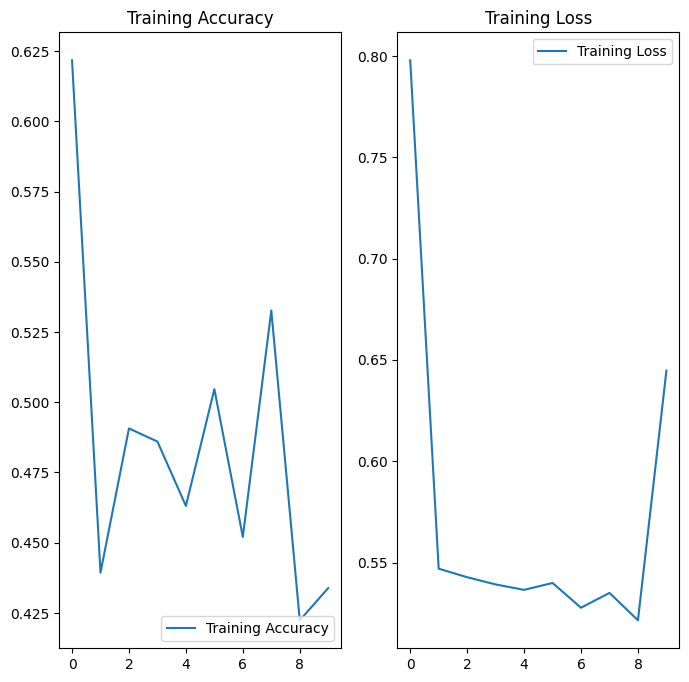

In [ ]:
acc = custhistory.history['accuracy']
loss = custhistory.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

# Xception

In [ ]:
import keras
from tensorflow.keras.models import Model
XC = keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    )

# Freeze the layers so that they are not trained during model fitting. We want to keep the imagenet weights
for layer in XC.layers:
    layer.trainable=False

# Change the final dense layer to 1 node (sigmoid activation) for binary classification
# could do 2 nodes and determine the probabilities of each class using SoftMax, but we used Sigmoid for our simple ConvNet
x = XC.layers[-2].output
output_layer = Dense(1, activation='sigmoid', name='predictions')(x)

# Combine the output layer to the original model
insulXC = Model(inputs=XC.input, outputs=output_layer)

# Sanity check: Print out the model summary. The final layer should have 1 neuron only (again, using sigmoid activation)
#MN_Categorical.summary()

# Compile the modified vgg model with the following hyperparameters (same as simple ConvNet)
# In future try different learning rates for the adam 'adaptive moment estimation'
insulXC.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

91884032/91884032 [==============================] - 1s 0us/step


In [ ]:
insulXCnhistory = insulXC.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs
)

<ipython-input-12-92f1b94a9634>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  insulXCnhistory = insulXC.fit_generator(


Epoch 1/15
17/17 [==============================] - 1234s 71s/step - loss: 0.3297 - accuracy: 0.8500
Epoch 2/15
17/17 [==============================] - 144s 8s/step - loss: 0.1681 - accuracy: 0.9322
Epoch 3/15
17/17 [==============================] - 138s 8s/step - loss: 0.1298 - accuracy: 0.9461
Epoch 4/15
17/17 [==============================] - 140s 8s/step - loss: 0.1044 - accuracy: 0.9645
Epoch 5/15
17/17 [==============================] - 138s 8s/step - loss: 0.0936 - accuracy: 0.9704
Epoch 6/15
17/17 [==============================] - 134s 8s/step - loss: 0.0840 - accuracy: 0.9784
Epoch 7/15
17/17 [==============================] - 145s 9s/step - loss: 0.0745 - accuracy: 0.9798
Epoch 8/15
17/17 [==============================] - 159s 9s/step - loss: 0.0668 - accuracy: 0.9847
Epoch 9/15
17/17 [==============================] - 149s 9s/step - loss: 0.0618 - accuracy: 0.9874
Epoch 10/15
17/17 [==============================] - 175s 10s/step - loss: 0.0559 - accuracy: 0.9892
Epoch 

In [ ]:
insulXC.save('gdrive/My Drive/Colab Notebooks/insulXC.h5')
insulXC.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insulresmodelOutput.txt', 'w')
f1.write("Exception\n")
f1.write(str(insulXCnhistory.history))
f1.close()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 - 49s - loss: 0.0971 - accuracy: 0.9829 - 49s/epoch - 25s/step


# Inception

In [ ]:
import keras
from tensorflow.keras.models import Model
inv3 = keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None
    )

# Freeze the layers so that they are not trained during model fitting. We want to keep the imagenet weights
for layer in inv3.layers:
    layer.trainable=False

# Change the final dense layer to 1 node (sigmoid activation) for binary classification
# could do 2 nodes and determine the probabilities of each class using SoftMax, but we used Sigmoid for our simple ConvNet
x = inv3.layers[-2].output
output_layer = Dense(1, activation='sigmoid', name='predictions')(x)

# Combine the output layer to the original model
insulinv3 = Model(inputs=inv3.input, outputs=output_layer)

# Sanity check: Print out the model summary. The final layer should have 1 neuron only (again, using sigmoid activation)
insulinv3.summary()

# Compile the modified vgg model with the following hyperparameters (same as simple ConvNet)
# In future try different learning rates for the adam 'adaptive moment estimation'
insulinv3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

96112376/96112376 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, 149, 149, 32)         96        ['conv2d_4[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)   

In [ ]:
insulinv3history = insulinv3.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs
)

<ipython-input-15-b6987af1b20a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  insulinv3history = insulinv3.fit_generator(


Epoch 1/15
17/17 [==============================] - 141s 7s/step - loss: 0.2901 - accuracy: 0.8643
Epoch 2/15
17/17 [==============================] - 128s 7s/step - loss: 0.1658 - accuracy: 0.9290
Epoch 3/15
17/17 [==============================] - 127s 7s/step - loss: 0.1268 - accuracy: 0.9551
Epoch 4/15
17/17 [==============================] - 127s 7s/step - loss: 0.1032 - accuracy: 0.9650
Epoch 5/15
17/17 [==============================] - 129s 8s/step - loss: 0.0917 - accuracy: 0.9742
Epoch 6/15
17/17 [==============================] - 131s 8s/step - loss: 0.0810 - accuracy: 0.9748
Epoch 7/15
17/17 [==============================] - 132s 8s/step - loss: 0.0719 - accuracy: 0.9807
Epoch 8/15
17/17 [==============================] - 130s 8s/step - loss: 0.0653 - accuracy: 0.9807
Epoch 9/15
17/17 [==============================] - 129s 8s/step - loss: 0.0604 - accuracy: 0.9843
Epoch 10/15
17/17 [==============================] - 132s 8s/step - loss: 0.0574 - accuracy: 0.9843
Epoch 11/

In [ ]:
insulinv3.save('gdrive/My Drive/Colab Notebooks/insulinv3.h5')
insulinv3.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insulinv3modelOutput.txt', 'w')
f1.write("InceptionV3\n")
f1.write(str(insulinv3history.history))
f1.close()

2/2 - 24s - loss: 0.1009 - accuracy: 0.9714 - 24s/epoch - 12s/step


# VGG19

In [ ]:
import keras
from tensorflow.keras.models import Model
vggv19 = keras.applications.vgg19.VGG19(include_top=True, weights='imagenet',
                               input_tensor=None, input_shape=(224,224,3), pooling=None) #could write input_shape=input_shape
#vgg.summary()             # print out the model summary

# Freeze the layers so that they are not trained during model fitting. We want to keep the imagenet weights
for layer in vggv19.layers:
    layer.trainable=False

# Change the final dense layer to 1 node (sigmoid activation) for binary classification
# could do 2 nodes and determine the probabilities of each class using SoftMax, but we used Sigmoid for our simple ConvNet
x = vggv19.layers[-2].output
output_layer = Dense(1, activation='sigmoid', name='predictions')(x)

# Combine the output layer to the original model
insulvgg19 = Model(inputs=vggv19.input, outputs=output_layer)

# Sanity check: Print out the model summary. The final layer should have 1 neuron only (again, using sigmoid activation)
insulvgg19.summary()

# Compile the modified vgg model with the following hyperparameters (same as simple ConvNet),
# In future try different learning rates for the adam 'adaptive moment estimation'
insulvgg19.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

574710816/574710816 [==============================] - 4s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

In [ ]:
insulvgg19history = insulvgg19.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs
)

<ipython-input-18-a6a212616a10>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  insulvgg19history = insulvgg19.fit_generator(


Epoch 1/15
17/17 [==============================] - 144s 7s/step - loss: 0.4965 - accuracy: 0.7713
Epoch 2/15
17/17 [==============================] - 133s 8s/step - loss: 0.3384 - accuracy: 0.8706
Epoch 3/15
17/17 [==============================] - 129s 7s/step - loss: 0.2563 - accuracy: 0.9070
Epoch 4/15
17/17 [==============================] - 132s 8s/step - loss: 0.2116 - accuracy: 0.9474
Epoch 5/15
17/17 [==============================] - 132s 8s/step - loss: 0.1805 - accuracy: 0.9596
Epoch 6/15
17/17 [==============================] - 133s 8s/step - loss: 0.1634 - accuracy: 0.9627
Epoch 7/15
17/17 [==============================] - 132s 8s/step - loss: 0.1514 - accuracy: 0.9587
Epoch 8/15
17/17 [==============================] - 130s 8s/step - loss: 0.1401 - accuracy: 0.9654
Epoch 9/15
17/17 [==============================] - 133s 8s/step - loss: 0.1290 - accuracy: 0.9690
Epoch 10/15
17/17 [==============================] - 133s 8s/step - loss: 0.1193 - accuracy: 0.9735
Epoch 11/

In [ ]:
insulvgg19.save('gdrive/My Drive/Colab Notebooks/insulvgg19.h5')
insulvgg19.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insulvgg19modelOutput.txt', 'w')
f1.write("VGG19\n")
f1.write(str(insulvgg19history.history))
f1.close()

2/2 - 26s - loss: 0.2273 - accuracy: 0.8914 - 26s/epoch - 13s/step


# Hybrid Method - Model Merging

In [ ]:
from google.colab import files
insulAlex=files.upload()

Saving insulAlex (1).h5 to insulAlex (1).h5


In [ ]:
from google.colab import files
insulres=files.upload()

Saving insulres10 (2).h5 to insulres10 (2).h5


In [ ]:
#load the existing model available in the gdrive (DenseNet,ResNet)
modelalex = tf.keras.models.load_model('insul.h5')
modelres = tf.keras.models.load_model('insulres10 (2).h5')

# **1.Combine Inception & Exception**

In [ ]:
#load the existing model available in the gdrive (Inception,Exception)
modelinc = tf.keras.models.load_model('gdrive/My Drive/Colab Notebooks/insulinv3.h5')
modelXC = tf.keras.models.load_model('gdrive/My Drive/Colab Notebooks/insulXC.h5')

NameError: name 'tf' is not defined

In [ ]:
#Assign the input image size as 224,224,3
input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
# Set the Output size as number of classes (1, sigmoid for binary classisfication)
# (2, softmax for multiclass)
n_classes=1
inputs = tf.keras.layers.Input(shape=input_shape)
#combine the two models
combined = tf.keras.layers.Concatenate()([modelinc(inputs), modelXC(inputs)])

outputs = tf.keras.layers.Dense(n_classes)(combined)

modelincXC = tf.keras.models.Model(inputs, outputs)


In [ ]:
modelinc.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, 149, 149, 32)         96        ['conv2d_4[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization_4[

In [ ]:
modelinc.trainable = False
modelXC.trainable = False
modelincXC.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
insuincXChistory=modelincXC.fit(train_data_gen,epochs=10)

Epoch 1/10
18/18 [==============================] - 921s 49s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 2/10
18/18 [==============================] - 158s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 3/10
18/18 [==============================] - 148s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 4/10
18/18 [==============================] - 154s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 5/10
18/18 [==============================] - 156s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 6/10
18/18 [==============================] - 149s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 7/10
18/18 [==============================] - 149s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 8/10
18/18 [==============================] - 155s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 9/10
18/18 [==============================] - 161s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 10/10
18/18 [==============================] - 168s 9s/step - loss: 3.5978 - accuracy: 0.7668


In [ ]:
#modelincXC.save('/content/gdrive/MyDrive/Colab Notebooks/insuincXChistory.history')
modelincXC.save('gdrive/My Drive/Colab Notebooks/insulincXC.h5')
modelincXC.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insulincXCmodelOutput.txt', 'w')
f1.write("Inception & Exception\n")
f1.write(str(insuincXChistory.history))
f1.close()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 - 52s - loss: 4.4071 - accuracy: 0.7143 - 52s/epoch - 26s/step


In [ ]:
test_labels = np.asarray(test_data_gen.labels, dtype=np.int32)
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

2/2 [==============================] - 20s 4s/step
              precision    recall  f1-score   support

      normal       0.71      1.00      0.83       125
      defect       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

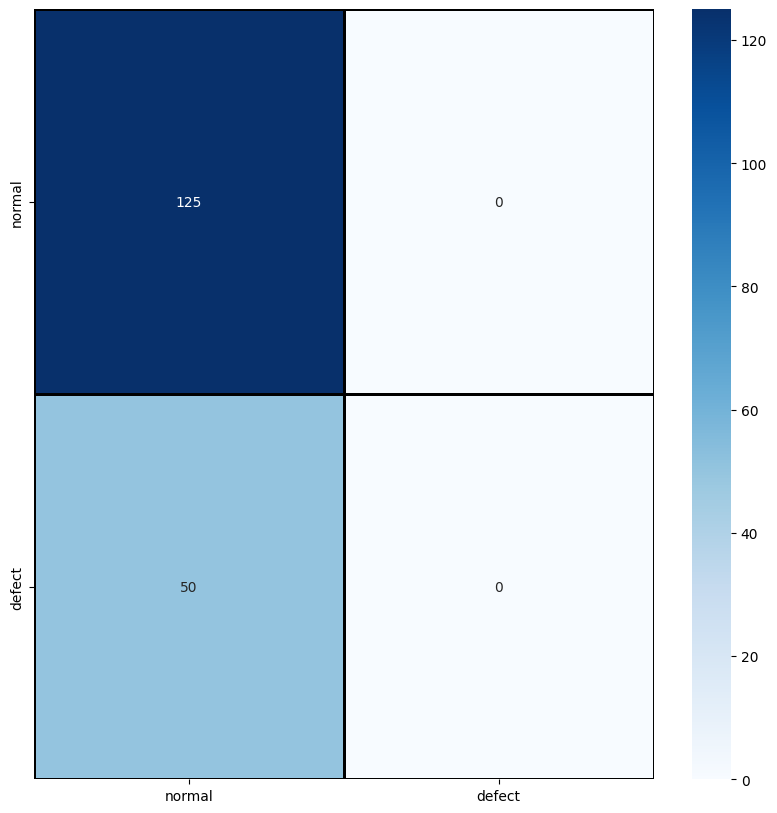

In [ ]:
test_labels = np.asarray(test_data_gen.labels, dtype=np.int32)
categories= ['normal', 'defect' ]
predictions = (modelincXC.predict(test_data_gen))
predictions[:10]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_labels_encoded = le.fit_transform(test_labels)
from sklearn.metrics import classification_report
test_labels = test_labels.ravel()
predictions = predictions.argmax(axis=1)
print(classification_report(test_labels, predictions, target_names=categories))
cm = confusion_matrix(test_labels,predictions)
cm = pd.DataFrame(cm , index = categories , columns = categories)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',
            xticklabels = categories , yticklabels =categories)

# **2. Combine Inception and VGG19**

In [ ]:
#load the existing model available in the gdrive (Inception,Exception)
modelinc = tf.keras.models.load_model('gdrive/My Drive/Colab Notebooks/insulinv3.h5')
modelvgg19 = tf.keras.models.load_model('gdrive/My Drive/Colab Notebooks/insulvgg19.h5')


In [ ]:
#Assign the input image size as 224,224,3
input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
# Set the Output size as number of classes (1, sigmoid for binary classisfication)
# (2, softmax for multiclass)
n_classes=1
inputs = tf.keras.layers.Input(shape=input_shape)
#combine the two models
combined = tf.keras.layers.Concatenate()([modelinc(inputs), modelvgg19(inputs)])

outputs = tf.keras.layers.Dense(n_classes)(combined)

modelincvgg19 = tf.keras.models.Model(inputs, outputs)


In [ ]:
modelinc.trainable = False
modelvgg19.trainable = False
modelincvgg19.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
insuincvgg19history=modelincvgg19.fit(train_data_gen,epochs=10)

Epoch 1/10
18/18 [==============================] - 186s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 2/10
18/18 [==============================] - 156s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 3/10
18/18 [==============================] - 183s 10s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 4/10
18/18 [==============================] - 149s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 5/10
18/18 [==============================] - 147s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 6/10
18/18 [==============================] - 154s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 7/10
18/18 [==============================] - 148s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 8/10
18/18 [==============================] - 146s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 9/10
18/18 [==============================] - 153s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 10/10
18/18 [==============================] - 149s 8s/step - loss: 3.5978 - accuracy: 0.7668


In [ ]:
modelincvgg19.save('gdrive/My Drive/Colab Notebooks/insulincvgg19.h5')
modelincvgg19.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insulincvgg19modelOutput.txt', 'w')
f1.write("Inception & VGG19\n")
f1.write(str(insuincvgg19history.history))
f1.close()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 - 30s - loss: 4.4071 - accuracy: 0.7143 - 30s/epoch - 15s/step


# Performance Metrics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.applications import VGG19,VGG16
import cv2
import os
import random
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import load_model # to save the model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.random import set_seed
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow.keras import utils as np_utils
import requests
import urllib
from io import BytesIO
from PIL import Image

2/2 [==============================] - 22s 6s/step
              precision    recall  f1-score   support

      normal       0.71      1.00      0.83       125
      defect       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

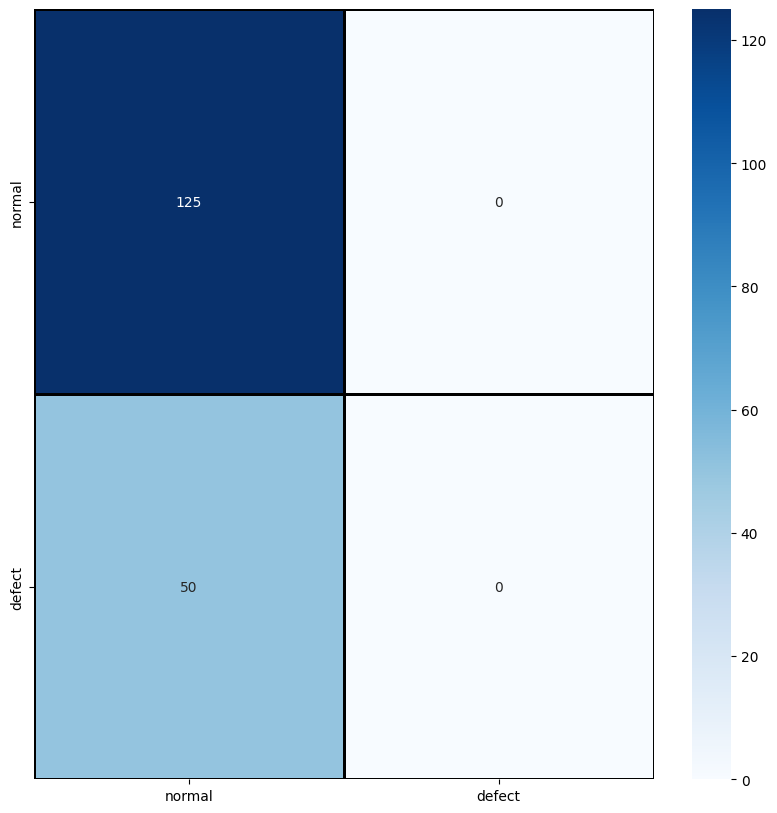

In [ ]:
test_labels = np.asarray(test_data_gen.labels, dtype=np.int32)
categories= ['normal', 'defect' ]
predictions = (modelincvgg19.predict(test_data_gen))
predictions[:10]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_labels_encoded = le.fit_transform(test_labels)
from sklearn.metrics import classification_report
test_labels = test_labels.ravel()
predictions = predictions.argmax(axis=1)
print(classification_report(test_labels, predictions, target_names=categories))
cm = confusion_matrix(test_labels,predictions)
cm = pd.DataFrame(cm , index = categories , columns = categories)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',
            xticklabels = categories , yticklabels =categories)

## 3. Combine Xception and VGG19

In [ ]:
#load the existing model available in the gdrive (Inception,Exception)
modelXC = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/insulXC.h5')
modelvgg19 = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/insulvgg19.h5')

In [ ]:
#Assign the input image size as 224,224,3
input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
# Set the Output size as number of classes (1, sigmoid for binary classisfication)
# (2, softmax for multiclass)
n_classes=1
inputs = tf.keras.layers.Input(shape=input_shape)
#combine the two models
combined = tf.keras.layers.Concatenate()([modelXC(inputs), modelvgg19(inputs)])

outputs = tf.keras.layers.Dense(n_classes)(combined)

modelXCvgg19 = tf.keras.models.Model(inputs, outputs)


In [ ]:
modelXC.trainable = False
modelvgg19.trainable = False
modelXCvgg19.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
insuXCvgg19history=modelXCvgg19.fit(train_data_gen,epochs=10)

Epoch 1/10
18/18 [==============================] - 993s 55s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 2/10
18/18 [==============================] - 162s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 3/10
18/18 [==============================] - 155s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 4/10
18/18 [==============================] - 153s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 5/10
18/18 [==============================] - 150s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 6/10
18/18 [==============================] - 156s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 7/10
18/18 [==============================] - 158s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 8/10
18/18 [==============================] - 148s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 9/10
18/18 [==============================] - 167s 9s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 10/10
18/18 [==============================] - 160s 9s/step - loss: 3.5978 - accuracy: 0.7668


In [ ]:
modelXCvgg19.save('gdrive/My Drive/Colab Notebooks/insulXCvgg19.h5')
modelXCvgg19.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insulXCvgg19modelOutput.txt', 'w')
f1.write(" Exception & VGG19\n")
f1.write(str(insuXCvgg19history.history))
f1.close()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 - 55s - loss: 4.4071 - accuracy: 0.7143 - 55s/epoch - 28s/step


2/2 [==============================] - 23s 5s/step
              precision    recall  f1-score   support

      normal       0.71      1.00      0.83       125
      defect       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

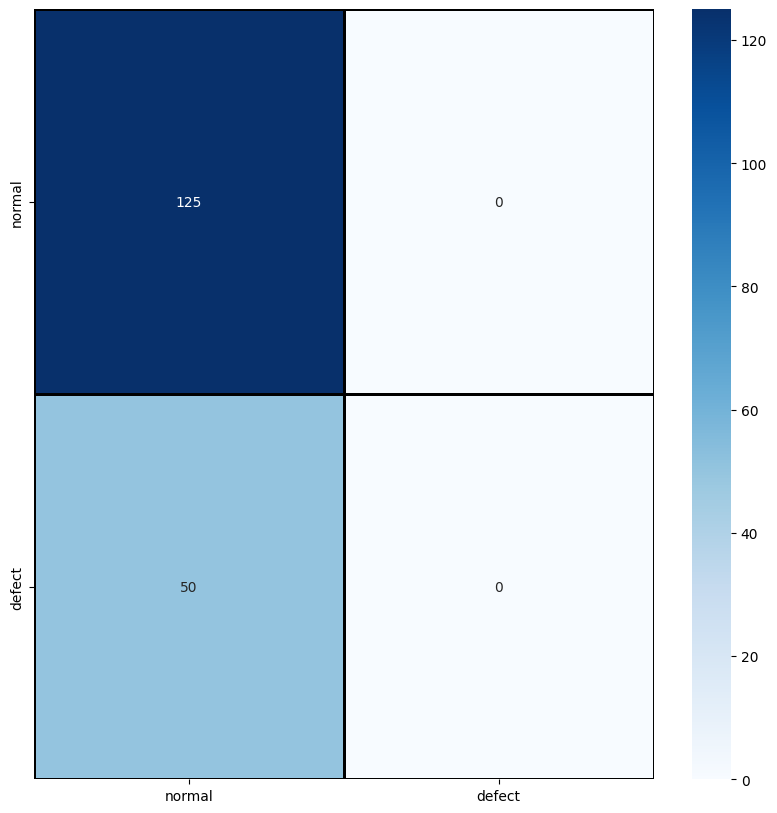

In [ ]:
test_labels = np.asarray(test_data_gen.labels, dtype=np.int32)
categories= ['normal', 'defect' ]
predictions = (modelXCvgg19.predict(test_data_gen))
predictions[:10]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_labels_encoded = le.fit_transform(test_labels)
from sklearn.metrics import classification_report
test_labels = test_labels.ravel()
predictions = predictions.argmax(axis=1)
print(classification_report(test_labels, predictions, target_names=categories))
cm = confusion_matrix(test_labels,predictions)
cm = pd.DataFrame(cm , index = categories , columns = categories)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',
            xticklabels = categories , yticklabels =categories)

# **4. Combine Xception and NASNet**

In [ ]:
#load the existing model available in the gdrive (Inception,NASNEt)
modelXC = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/insulXC.h5')
modelNAS = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/insulNs10.h5')

In [ ]:
#Assign the input image size as 224,224,3
input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
# Set the Output size as number of classes (1, sigmoid for binary classisfication)
# (2, softmax for multiclass)
n_classes=1
inputs = tf.keras.layers.Input(shape=input_shape)
#combine the two models
combined = tf.keras.layers.Concatenate()([modelXC(inputs), modelNAS(inputs)])

outputs = tf.keras.layers.Dense(n_classes)(combined)

modelXCNAS = tf.keras.models.Model(inputs, outputs)

ValueError: The name "model" is used 2 times in the model. All layer names should be unique.

In [ ]:
#Assign the input image size as 224,224,3
input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
# Set the Output size as number of classes (1, sigmoid for binary classisfication)
# (2, softmax for multiclass)
n_classes=1
inputs = tf.keras.layers.Input(shape=input_shape)
#combine the two models
combined = tf.keras.layers.Concatenate()([modelXC(inputs), modelNAS(inputs)])

outputs = tf.keras.layers.Dense(n_classes)(combined)

modelXCNAS = tf.keras.models.Model(inputs, outputs)

ValueError: The name "model" is used 2 times in the model. All layer names should be unique.

In [ ]:
modelXC.trainable = False
modelNAS.trainable = False
modelXCNAS.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
insuXCNAShistory=modelXCNAS.fit(train_data_gen,epochs=10)
modelXCNAS.save('gdrive/My Drive/Colab Notebooks/insulXCNAS.h5')
modelXCNAS.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insulXCNASmodelOutput.txt', 'w')
f1.write(" Xception & NAS\n")
f1.write(str(insuXCNAShistory.history))
f1.close()

In [ ]:
test_labels = np.asarray(test_data_gen.labels, dtype=np.int32)
categories= ['normal', 'defect' ]
predictions = (modelXCNAS.predict(test_data_gen))
predictions[:10]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_labels_encoded = le.fit_transform(test_labels)
from sklearn.metrics import classification_report
test_labels = test_labels.ravel()
predictions = predictions.argmax(axis=1)
print(classification_report(test_labels, predictions, target_names=categories))
cm = confusion_matrix(test_labels,predictions)
cm = pd.DataFrame(cm , index = categories , columns = categories)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',
            xticklabels = categories , yticklabels =categories)

# **5. Combine Xception and EfficientNet**

In [ ]:
#load the existing model available in the gdrive (Inception,NASNEt)
modelXC = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/insulXC.h5')
modelEN = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/insulEN.h5')

ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x7f35530bd0c0>.

In [ ]:
#Assign the input image size as 224,224,3
input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
# Set the Output size as number of classes (1, sigmoid for binary classisfication)
# (2, softmax for multiclass)
n_classes=1
inputs = tf.keras.layers.Input(shape=input_shape)
#combine the two models
combined = tf.keras.layers.Concatenate()([modelXC(inputs), modelEN(inputs)])

outputs = tf.keras.layers.Dense(n_classes)(combined)

modelXCEN = tf.keras.models.Model(inputs, outputs)

In [ ]:
modelXC.trainable = False
modelEN.trainable = False
modelXCEN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
insuXCENhistory=modelXCEN.fit(train_data_gen,epochs=10)
modelXCEN.save('gdrive/My Drive/Colab Notebooks/insulXCNAS.h5')
modelXCEN.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insulXCENmodelOutput.txt', 'w')
f1.write(" Xception & EfficientNet\n")
f1.write(str(insuXCENhistory.history))
f1.close()

In [ ]:
test_labels = np.asarray(test_data_gen.labels, dtype=np.int32)
categories= ['normal', 'defect' ]
predictions = (modelXCEN.predict(test_data_gen))
predictions[:10]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_labels_encoded = le.fit_transform(test_labels)
from sklearn.metrics import classification_report
test_labels = test_labels.ravel()
predictions = predictions.argmax(axis=1)
print(classification_report(test_labels, predictions, target_names=categories))
cm = confusion_matrix(test_labels,predictions)
cm = pd.DataFrame(cm , index = categories , columns = categories)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',
            xticklabels = categories , yticklabels =categories)

# **Combine AlexNet & ResNet**

In [ ]:
#Assign the input image size as 224,224,3
input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
# Set the Output size as number of classes (1, sigmoid for binary classisfication)
# (2, softmax for multiclass)
n_classes=1
inputs = tf.keras.layers.Input(shape=input_shape)
#combine the two models
combined = tf.keras.layers.Concatenate()([modelalex(inputs), modelres(inputs)])

outputs = tf.keras.layers.Dense(n_classes)(combined)

modelalexres = tf.keras.models.Model(inputs, outputs)

In [ ]:
modelalex.trainable = False
modelres.trainable = False
modelalexres.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
alexreshistory=modelalexres.fit(train_data_gen,epochs=10)

Epoch 1/10
19/19 [==============================] - 301s 15s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 2/10
19/19 [==============================] - 154s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 3/10
19/19 [==============================] - 148s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 4/10
19/19 [==============================] - 147s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 5/10
19/19 [==============================] - 146s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 6/10
19/19 [==============================] - 147s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 7/10
19/19 [==============================] - 152s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 8/10
19/19 [==============================] - 149s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 9/10
19/19 [==============================] - 147s 8s/step - loss: 3.5978 - accuracy: 0.7668
Epoch 10/10
19/19 [==============================] - 153s 8s/step - loss: 3.5978 - accuracy: 0.7668


In [ ]:
modelalexres.save('/content/gdrive/MyDrive/Colab Notebooks/insulalexresmodel.h5')
modelalexres.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insulalexresmodelOutput.txt', 'w')
f1.write("AlexRes\n")
f1.write(str(alexreshistory.history))
f1.close()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 - 49s - loss: 4.4071 - accuracy: 0.7143 - 49s/epoch - 24s/step


In [ ]:
modelalexres.save('/content/gdrive/MyDrive/Colab Notebooks/alexreshistory.history')

In [ ]:
import pandas as pd

# convert the history.history dict to a pandas DataFrame:
hist_alexres = pd.DataFrame(alexreshistory.history)

# save to json:

import json
with open('hist_json_alexres.json', 'w') as f:
    json.dump(alexreshistory.history, f)



# **ResNet** & **AlexNet**

In [ ]:
#Assign the input image size as 224,224,3
input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
# Set the Output size as number of classes (1, sigmoid for binary classisfication)
# (2, softmax for multiclass)
n_classes=1
inputs = tf.keras.layers.Input(shape=input_shape)
#combine the two models
combined = tf.keras.layers.Concatenate()([modelres(inputs), modelalex(inputs)])

outputs = tf.keras.layers.Dense(n_classes)(combined)

modelresalex = tf.keras.models.Model(inputs, outputs)

In [ ]:
modelalex.trainable = False
modelres.trainable = False
modelresalex.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
resalexhistory=modelresalex.fit(train_data_gen,epochs=10)

Epoch 1/10
19/19 [==============================] - 174s 9s/step - loss: 0.4237 - accuracy: 0.7668
Epoch 2/10
19/19 [==============================] - 148s 8s/step - loss: 0.3742 - accuracy: 0.7668
Epoch 3/10
19/19 [==============================] - 147s 8s/step - loss: 0.3443 - accuracy: 0.7668
Epoch 4/10
19/19 [==============================] - 146s 8s/step - loss: 0.3252 - accuracy: 0.7668
Epoch 5/10
19/19 [==============================] - 144s 8s/step - loss: 0.3154 - accuracy: 0.7668
Epoch 6/10
19/19 [==============================] - 147s 8s/step - loss: 0.3079 - accuracy: 0.7659
Epoch 7/10
19/19 [==============================] - 144s 8s/step - loss: 0.2977 - accuracy: 0.7655
Epoch 8/10
19/19 [==============================] - 147s 8s/step - loss: 0.2935 - accuracy: 0.7680
Epoch 9/10
19/19 [==============================] - 146s 8s/step - loss: 0.2913 - accuracy: 0.7727
Epoch 10/10
19/19 [==============================] - 146s 8s/step - loss: 0.2877 - accuracy: 0.7735


# **AlexNet & MobileNet**

In [ ]:
from google.colab import files
insullenet=files.upload()

Saving insulMN.h5 to insulMN.h5


In [ ]:
from google.colab import files
insulalex=files.upload()

Saving insulAlex.h5 to insulAlex.h5


In [ ]:
modelmn = tf.keras.models.load_model('insulMN.h5')
modelalex = tf.keras.models.load_model('insulAlex.h5')

In [ ]:
#Assign the input image size as 224,224,3
input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
# Set the Output size as number of classes (1, sigmoid for binary classisfication)
# (2, softmax for multiclass)
n_classes=1
inputs = tf.keras.layers.Input(shape=input_shape)
#combine the two models
combined = tf.keras.layers.Concatenate()([modelmn(inputs), modelalex(inputs)])

outputs = tf.keras.layers.Dense(n_classes)(combined)

modelmnalex = tf.keras.models.Model(inputs, outputs)

In [ ]:
modelalex.trainable = False
modelmn.trainable = False
modelmnalex.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mnalexhistory=modelmnalex.fit(train_data_gen,epochs=10)

NameError: name 'modelalex' is not defined

In [ ]:
modelmnalex.save('/content/gdrive/MyDrive/Colab Notebooks/insulmnalexmodel.h5')
modelmnalex.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insulmnalexmodelOutput.txt', 'w')
f1.write("MNAlex\n")
f1.write(str(mnalexhistory.history))
f1.close()

In [ ]:
import pandas as pd

# convert the history.history dict to a pandas DataFrame:
hist_alexmn = pd.DataFrame(mnalexhistory.history)

# save to json:

import json
with open('hist_json_alexmn.json', 'w') as f:
    json.dump(mnalexhistory.history, f)

# **ResNet** & **LeNet**

In [ ]:
#Assign the input image size as 224,224,3
input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
# Set the Output size as number of classes (1, sigmoid for binary classisfication)
# (2, softmax for multiclass)
n_classes=1
inputs = tf.keras.layers.Input(shape=input_shape)
#combine the two models
combined = tf.keras.layers.Concatenate()([modellenet(inputs), modelres(inputs)])

outputs = tf.keras.layers.Dense(n_classes)(combined)

modellenetres = tf.keras.models.Model(inputs, outputs)
modelres.trainable = False
modellenet.trainable = False
modellenetres.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lenetreshistory=modellenetres.fit(train_data_gen,epochs=10)

modellenetres.save('/content/gdrive/MyDrive/Colab Notebooks/insullenetresmodel.h5')
modellenetres.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)
f1=open('gdrive/My Drive/Colab Notebooks/insullenetresmodelOutput.txt', 'w')
f1.write("lenetRes\n")
f1.write(str(lenetreshistory.history))
f1.close()

import pandas as pd

# convert the history.history dict to a pandas DataFrame:
hist_lenetres = pd.DataFrame(lenetreshistory.history)

# save to json:

import json
with open('hist_json_lenetres.json', 'w') as f:
    json.dump(lenetreshistory.history, f)

In [ ]:
modeldnres = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/insuldnresmodel.h5')
modeldnres.evaluate(test_data_gen,steps=len(test_data_gen),verbose=2)


2/2 - 49s - loss: 0.3664 - accuracy: 0.8629 - 49s/epoch - 24s/step


[0.36644911766052246, 0.8628571629524231]

In [ ]:
modeldn.trainable = False
modelres.trainable = False
modeldnres.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modeldnres.fit(train_data_gen,epochs=10)

Epoch 1/10
19/19 [==============================] - 1198s 61s/step - loss: 0.0745 - accuracy: 0.9792
Epoch 2/10
19/19 [==============================] - 1175s 61s/step - loss: 0.0675 - accuracy: 0.9809
Epoch 3/10
19/19 [==============================] - 1180s 61s/step - loss: 0.0649 - accuracy: 0.9813
Epoch 4/10
19/19 [==============================] - 1184s 61s/step - loss: 0.0635 - accuracy: 0.9826
Epoch 5/10
19/19 [==============================] - 1188s 61s/step - loss: 0.0625 - accuracy: 0.9826
Epoch 6/10
19/19 [==============================] - 1183s 61s/step - loss: 0.0616 - accuracy: 0.9822
Epoch 7/10
19/19 [==============================] - 1183s 61s/step - loss: 0.0610 - accuracy: 0.9818
Epoch 8/10
 2/19 [==>...........................] - ETA: 16:25 - loss: 0.0848 - accuracy: 0.9727

UnknownError: ignored

# Hybrid Models- VGG16 & NAS Net

In [ ]:
import keras
from tensorflow.keras.models import Model

vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3), pooling=None)


tf.compat.v1.keras.applications.NASNetLarge, tf.compat.v1.keras.applications.nasnet.NASNetLarge
NsNet=tf.keras.applications.nasnet.NASNetLarge(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling=None
)
# Freeze the layers so that they are not trained during model fitting. We want to keep the imagenet weights
for layer in vgg16.layers:
    layer.trainable=False
for layer in NsNet.layers:
    layer.trainable=False

vggout=vgg16.layers[-1].output
NsNetout=NsNet.layers[-1].output

from keras.layers import concatenate
from keras.layers import Concatenate
insulvggnas=concatenate([vggout,NsNetout])

#x=insulvggnas.layers[-2].output
output_layer=Dense(2, activation='softmax')(insulvggnas)


# Change the final dense layer to 1 node (sigmoid activation) for binary classification
# could do 2 nodes and determine the probabilities of each class using SoftMax, but we used Sigmoid for our simple ConvNet
#x = vgg16.layers[-2].output
#output_layer = Dense(2, activation='softmax', name='predictions')(x)

# Combine the output layer to the original model
insulvggnasmodel = Model(inputs=[vgg16.input,NsNet.input], outputs=[vggout,NsNetout])


# Compile the modified vgg model with the following hyperparameters (same as simple ConvNet)
# In future try different learning rates for the adam 'adaptive moment estimation'
insulvggnasmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
insulvggNsNethistory = insulvggnasmodel.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs
)

In [ ]:
from tensorflow.keras.models import Model
tf.compat.v1.keras.applications.densenet.DenseNet121
tf.compat.v1.keras.applications.InceptionV3, tf.compat.v1.keras.applications.inception_v3.InceptionV3
#inv3 = tf.keras.applications.inception_v3.InceptionV3(
model1 =tf.keras.applications.densenet.DenseNet121(weights='imagenet', include_top=False, pooling='avg', input_shape=(224,224,3))
out1 = model1.output

model2 = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling='avg', input_shape=(224,224,3))
out2 = model2.output

x = concatenate([out1, out2])  # merge the outputs of the two models
out = Dense(1, activation='sigmoid')(x)  # final layer of the network

model = Model(inputs=[model1.input, model2.input], outputs=[out])

model.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit_generator(generator=train_data_gen,
                          epochs=2,
                          verbose=1
                         )

In [ ]:
from tensorflow.keras.models import Model
tf.compat.v1.keras.applications.NASNetLarge, tf.compat.v1.keras.applications.nasnet.NASNetLarge
NsNet=tf.keras.applications.nasnet.NASNetLarge(
    input_shape=None,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
)

# Freeze the layers so that they are not trained during model fitting. We want to keep the imagenet weights
for layer in NsNet.layers:
    layer.trainable=False

# Change the final dense layer to 1 node (sigmoid activation) for binary classification
# could do 2 nodes and determine the probabilities of each class using SoftMax, but we used Sigmoid for our simple ConvNet
x = NsNet.layers[-2].output
output_layer = Dense(1, activation='sigmoid', name='predictions')(x)

# Combine the output layer to the original model
insulNsNet= Model(inputs=NsNet.input, outputs=output_layer)

# Sanity check: Print out the model summary. The final layer should have 1 neuron only (again, using sigmoid activation)
#NsNet_categorical.summary()

# Compile the modified vgg model with the following hyperparameters (same as simple ConvNet)
# In future try different learning rates for the adam 'adaptive moment estimation'
insulNsNet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
insulNsNethistory = insulNsNet.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs
)


# Comparison

In [ ]:
LeNet={'loss': [2.357649803161621, 2.1520018577575684, 1.761558175086975, 1.4079748392105103, 1.07777738571167, 0.7705360651016235, 0.5861400365829468, 0.5421687364578247, 0.5472308397293091, 0.5441268086433411], 'accuracy': [0.7488788962364197, 0.7641255855560303, 0.768609881401062, 0.768161416053772, 0.7659192681312561, 0.7695067524909973, 0.768609881401062, 0.768161416053772, 0.7641255855560303, 0.7663677334785461]}
AlexNet={'loss': [0.6599500179290771, 0.521018385887146, 0.3860208988189697, 0.3808761239051819, 0.30705955624580383, 0.27484095096588135, 0.26088446378707886, 0.2513766288757324, 0.22747142612934113, 0.21019969880580902], 'accuracy': [0.7452914714813232, 0.768161416053772, 0.7659192681312561, 0.7807174921035767, 0.8582959771156311, 0.8762331604957581, 0.8784753084182739, 0.8806423544883728, 0.9004484415054321, 0.907623291015625]}
DenseNet={'loss': [0.6204864978790283, 0.3312571942806244, 0.2277112752199173, 0.17957808077335358, 0.15285855531692505, 0.13220150768756866, 0.11711861193180084, 0.10730637609958649, 0.09551747888326645, 0.09071829915046692], 'accuracy': [0.6717488765716553, 0.8645740151405334, 0.9224215149879456, 0.9399102926254272, 0.9502242207527161, 0.9605380892753601, 0.9690582752227783, 0.9757847785949707, 0.9784753322601318, 0.9811659455299377]}
MobileNet={'loss': [0.8349427580833435, 0.15737304091453552, 0.09224594384431839, 0.07602222263813019, 0.05740322172641754, 0.04622592404484749, 0.03714926168322563, 0.03227797523140907, 0.026463044807314873, 0.023949244990944862], 'accuracy': [0.7654708623886108, 0.9354259967803955, 0.9636771082878113, 0.9713004231452942, 0.9793722033500671, 0.9807174801826477, 0.9847533702850342, 0.98699551820755, 0.9887892603874207, 0.9932735562324524]}
NASNet={'loss': [0.25792622566223145, 0.11049675941467285, 0.07732132822275162, 0.06262647360563278, 0.053581852465867996, 0.04516118764877319, 0.03964455425739288, 0.03565702959895134, 0.032437462359666824, 0.030426446348428726], 'accuracy': [0.8798206448554993, 0.9547085165977478, 0.9721972942352295, 0.9807174801826477, 0.98699551820755, 0.9905829429626465, 0.9937219619750977, 0.9937219619750977, 0.994618833065033, 0.9941704273223877]}
ResNet={'loss': [0.6616663932800293, 0.5466290712356567, 0.511279284954071, 0.495803564786911, 0.4770311415195465, 0.4641006588935852, 0.4514144957065582, 0.43811342120170593, 0.4290117025375366, 0.41747498512268066], 'accuracy': [0.6192824840545654, 0.7668161392211914, 0.7659192681312561, 0.7636771202087402, 0.7659192681312561, 0.7663677334785461, 0.7654708623886108, 0.768161416053772, 0.7663677334785461, 0.7668161392211914]}
VGG16={'loss': [0.5912691354751587, 0.33000448346138, 0.23463036119937897, 0.1880883425474167, 0.16024301946163177, 0.14273326098918915, 0.12915459275245667, 0.11882024258375168, 0.11070197075605392, 0.1041283905506134], 'accuracy': [0.7443946003913879, 0.8551569581031799, 0.949775755405426, 0.9556053876876831, 0.9600896835327148, 0.9654708504676819, 0.9695067405700684, 0.9686098694801331, 0.9721972942352295, 0.9709201455116272]}
VGG19={'loss': [0.49654385447502136, 0.3384019434452057, 0.2562764286994934, 0.2115834802389145, 0.18045896291732788, 0.16339513659477234, 0.15136156976222992, 0.1400531679391861, 0.1289660632610321, 0.11929923295974731, 0.11279996484518051, 0.1078762635588646, 0.10380789637565613, 0.09688179194927216, 0.09532999247312546], 'accuracy': [0.771338701248169, 0.8706199526786804, 0.9070081114768982, 0.9474393725395203, 0.9595687389373779, 0.962713360786438, 0.9586702585220337, 0.9654088020324707, 0.9690027236938477, 0.9734950661659241, 0.9739443063735962, 0.9766396880149841, 0.976190447807312, 0.9793351292610168, 0.982928991317749]}
AlexRes={'loss': [3.597846269607544, 3.597846269607544, 3.597846031188965, 3.597846269607544, 3.597846269607544, 3.597846269607544, 3.597846031188965, 3.597846269607544, 3.597846031188965, 3.597846269607544], 'accuracy': [0.7667514681816101, 0.7667514681816101, 0.7667514681816101, 0.7667514681816101, 0.7667514681816101, 0.7667514681816101, 0.7667514681816101, 0.7667514681816101, 0.7667514681816101, 0.7667514681816101]}
DNRes={'loss': [0.424124538898468, 0.367524117231369, 0.3204096555709839, 0.2931399345397949, 0.25830867886543274, 0.23804034292697906, 0.2269350290298462, 0.2132616639137268, 0.19750922918319702, 0.18264815211296082], 'accuracy': [0.8969465494155884, 0.9033079147338867, 0.9088210463523865, 0.91518235206604, 0.9215436577796936, 0.9257845878601074, 0.9304495453834534, 0.9346904158592224, 0.9376590251922607, 0.9431721568107605]}
InceptionV3={'loss': [0.29014649987220764, 0.16582591831684113, 0.1268066167831421, 0.10320994257926941, 0.09173887223005295, 0.08098436146974564, 0.07192723453044891, 0.06532512605190277, 0.06040437892079353, 0.05744682624936104, 0.053570456802845, 0.04883663356304169, 0.04743532836437225, 0.04344864934682846, 0.04204297438263893], 'accuracy': [0.8643306493759155, 0.9290206432342529, 0.9550763964653015, 0.9649595618247986, 0.9741532802581787, 0.9748427867889404, 0.9806828498840332, 0.9806828498840332, 0.9842767119407654, 0.9842767119407654, 0.9847259521484375, 0.9874213933944702, 0.9878706336021423, 0.9905660152435303, 0.9914644956588745]}
Xception={'loss': [0.3297242522239685, 0.16812002658843994, 0.12980608642101288, 0.10438494384288788, 0.09357361495494843, 0.084027498960495, 0.07451359927654266, 0.06680595129728317, 0.061776790767908096, 0.0558929443359375, 0.05206788331270218, 0.04982955753803253, 0.046152327209711075, 0.044602736830711365, 0.04158656671643257], 'accuracy': [0.8499550819396973, 0.9321653246879578, 0.9460916519165039, 0.9645103216171265, 0.9703503847122192, 0.9784366488456726, 0.979784369468689, 0.9847259521484375, 0.9874213933944702, 0.9892183542251587, 0.9905660152435303, 0.9910152554512024, 0.9928698539733887, 0.9923629760742188, 0.9941599369049072]}


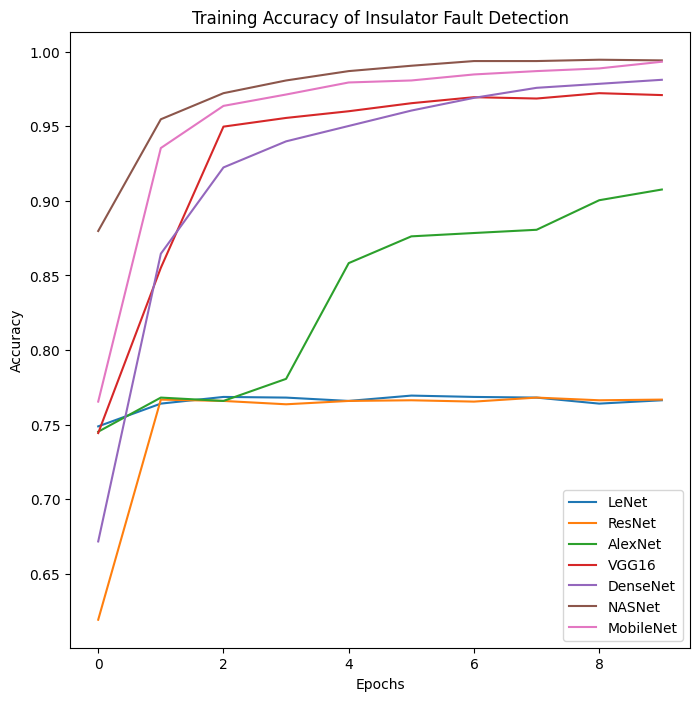

In [ ]:
epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, LeNet['accuracy'], label='LeNet')
plt.plot(epochs_range, ResNet['accuracy'], label='ResNet')
plt.plot(epochs_range, AlexNet['accuracy'], label='AlexNet')
#plt.plot(epochs_range, Pmodelhist['accuracy'], label='ProposedNet')
plt.plot(epochs_range, VGG19['accuracy'], label='VGG19')
plt.plot(epochs_range, VGG16['accuracy'], label='VGG16')
plt.plot(epochs_range, DenseNet['accuracy'], label='DenseNet')
plt.plot(epochs_range, NASNet['accuracy'], label='NASNet')
plt.plot(epochs_range, Xception['accuracy'], label='Xception')
plt.plot(epochs_range, InceptionV3['accuracy'], label='InceptionV3')
plt.plot(epochs_range, MobileNet['accuracy'], label='MobileNet')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training Accuracy of Insulator Fault Detection')
plt.show()

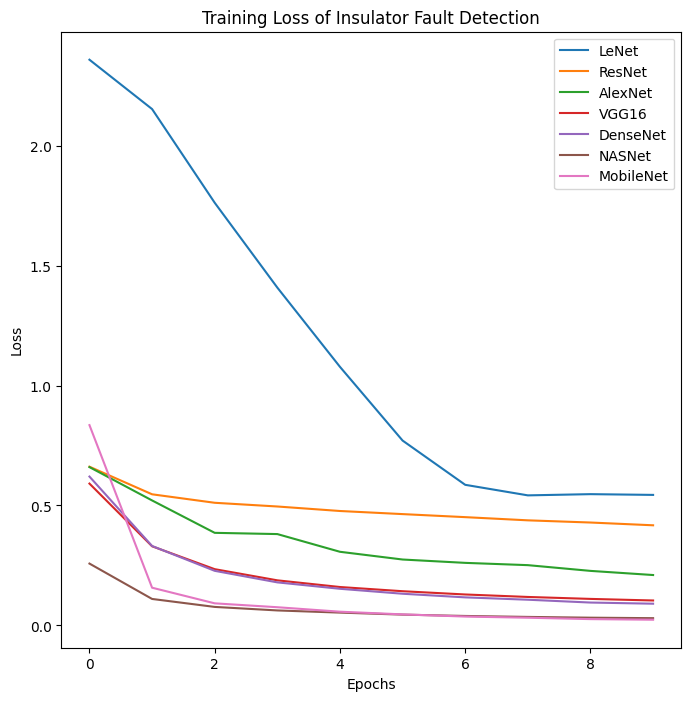

In [ ]:
epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, LeNet['loss'], label='LeNet')
plt.plot(epochs_range, ResNet['loss'], label='ResNet')
plt.plot(epochs_range, AlexNet['loss'], label='AlexNet')
#plt.plot(epochs_range, Pmodelhist['loss'], label='ProposedNet')
#plt.plot(epochs_range, VGG19hist['loss'], label='VGG19')
plt.plot(epochs_range, VGG16['loss'], label='VGG16')
plt.plot(epochs_range, DenseNet['loss'], label='DenseNet')
plt.plot(epochs_range, NASNet['loss'], label='NASNet')
#plt.plot(epochs_range, Xceptionhist['loss'], label='Xception')
#plt.plot(epochs_range, Inceptionhist['loss'], label='Inception')
plt.plot(epochs_range, MobileNet['loss'], label='MobileNet')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training Loss of Insulator Fault Detection')
plt.show()

# Model Output Comparison

In [ ]:
LeNet={'loss': [2.357649803161621, 2.1520018577575684, 1.761558175086975, 1.4079748392105103, 1.07777738571167, 0.7705360651016235, 0.5861400365829468, 0.5421687364578247, 0.5472308397293091, 0.5441268086433411], 'accuracy': [0.7488788962364197, 0.7641255855560303, 0.768609881401062, 0.768161416053772, 0.7659192681312561, 0.7695067524909973, 0.768609881401062, 0.768161416053772, 0.7641255855560303, 0.7663677334785461]}
epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, LeNet['accuracy'], label='LeNet')
plt.plot(epochs_range, LeNet['loss'], label='LeNet')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training Accuracy of Insulator Fault Detection')
plt.show()

In [ ]:
AlexNet={'loss': [0.6599500179290771, 0.521018385887146, 0.3860208988189697, 0.3808761239051819, 0.30705955624580383, 0.27484095096588135, 0.26088446378707886, 0.2513766288757324, 0.22747142612934113, 0.21019969880580902], 'accuracy': [0.7452914714813232, 0.768161416053772, 0.7659192681312561, 0.7807174921035767, 0.8582959771156311, 0.8762331604957581, 0.8784753084182739, 0.8806423544883728, 0.9004484415054321, 0.907623291015625]}


In [ ]:
LeNethist= {'loss': [3.6346 , 3.0901 , 2.9720 , 2.8891 , 2.8090 , 2.7405 , 2.6960 , 2.6469 , 2.5815 , 2.5131 ], 'accuracy': [0.0915 , 0.1194 , 0.0986 , 0.0770 , 0.0951 , 0.0915 , 0.0833 , 0.0927 , 0.0833 , 0.0857 ], 'val_loss': [2.9642 , 2.9022 , 3.0301 , 2.8034 , 2.7963 , 2.8516 , 2.5927 , 2.5112 , 2.6114 , 2.4706 ], 'val_accuracy': [0.0859, 0.0938, 0.0938, 0.1250, 0.0703, 0.1094, 0.1094, 0.1016, 0.0781, 0.1250]}

ResNethist= {'loss': [2.5216     , 2.2896    ,2.2589   , 2.2066   , 2.1536     , 2.1239    , 2.0881   , 2.0488   , 2.0235  , 1.9965 ], 'accuracy': [0.0962    ,0.1115  , 0.1714    , 0.2230    , 0.2711    , 0.2359   , 0.3281   , 0.3873  , 0.4167    , 0.3592  ], 'val_loss': [2.2721   , 2.2669   , 2.2062   , 2.1722  , 2.1306  , 2.0811    , 2.0548    , 1.9966  , 1.9994    , 1.9851  ], 'val_accuracy': [0.1016, 0.1016, 0.2422, 0.2500, 0.2734, 0.3125, 0.3906, 0.4609, 0.3828, 0.3828]}

AlexNethist= {'loss': [2.3472      , 2.2943     ,2.1779      , 2.2548   , 2.2108      , 2.1535     , 2.0373    , 1.9584     , 1.8394   , 1.7279 ], 'accuracy': [0.0939      ,0.1092    ,0.1561      , 0.1549      , 0.1514     ,0.1502   , 0.1948    , 0.2066   , 0.2793      , 0.3181   ], 'val_loss': [2.3074     , 2.2283    ,2.2492    , 2.1765     , 2.1369   , 2.0521     , 2.0000   , 1.8777   , 1.7550    , 1.5530    ], 'val_accuracy': [0.0547, 0.0938, 0.1562, 0.1562, 0.1641, 0.2188, 0.2109, 0.3203, 0.3438, 0.3906]}


Pmodelhist={'loss': [7.047580718994141, 1.9934090375900269, 1.7212581634521484, 1.4130667448043823, 1.1845824718475342, 1.006230354309082, 0.8924443125724792, 0.7205039858818054, 0.6947044134140015, 0.5148845314979553], 'accuracy': [0.14319248497486115, 0.26995304226875305, 0.3791079819202423, 0.5046948194503784, 0.577464759349823, 0.6561033129692078, 0.6875, 0.7523474097251892, 0.7523474097251892, 0.827464759349823], 'val_loss': [2.142678737640381, 1.8811776638031006, 1.6231918334960938, 1.2113595008850098, 1.1121628284454346, 0.9766740798950195, 0.7449628114700317, 0.5522032380104065, 0.4607861042022705, 0.40604469180107117], 'val_accuracy': [0.125, 0.3359375, 0.609375, 0.6328125, 0.7109375, 0.7109375, 0.8203125, 0.875, 0.8984375, 0.890625]}

VGG19hist= {'loss': [2.3648   , 1.6252  ,1.2427  , 0.9969   , 0.8308   , 0.7172   , 0.6392  , 0.5898  , 0.5672  , 0.5251   ], 'accuracy': [0.2277   ,0.4660 , 0.6538  , 0.7559   , 0.8239   , 0.8263   , 0.8521   , 0.8521  , 0.8545   , 0.8662  ], 'val_loss': [1.8062  , 1.4030  , 1.1252  , 0.9879 , 0.8072 , 0.7222  , 0.7010  , 0.6172 , 0.5475   , 0.5542  ], 'val_accuracy': [0.4219, 0.5625, 0.7500, 0.7344, 0.7969, 0.8281, 0.8047, 0.8594, 0.8516, 0.8203]}

VGG16hist= {'loss': [2.5046  , 1.6729  , 1.2501 , 0.9719  , 0.7824  , 0.6831  , 0.6109  , 0.5865 , 0.5286 , 0.4804  ], 'accuracy': [0.1843  ,0.4190, 0.6362  , 0.7570  , 0.8228  , 0.8545  , 0.8674  , 0.8603  , 0.8817  , 0.8744  ], 'val_loss': [1.8546  , 1.4318  , 1.1182 , 0.8116  , 0.8265 , 0.6554 , 0.6339  , 0.5634 , 0.5244  , 0.5261 ], 'val_accuracy': [0.4531, 0.6016, 0.6172, 0.7891, 0.8125, 0.8359, 0.8672, 0.8594, 0.8359, 0.8672]}

DenseNethist= {'loss': [2.5362331867218018, 1.5820480585098267, 1.0092664957046509, 0.6460946798324585, 0.4541071355342865, 0.3298524022102356, 0.2594795227050781, 0.2127697914838791, 0.1837950348854065, 0.16626138985157013], 'accuracy': [0.18896713852882385, 0.5152581930160522, 0.7354910969734192, 0.8626760840415955, 0.9178403615951538, 0.9518779516220093, 0.9589201807975769, 0.96875, 0.9718309640884399, 0.9741784334182739], 'val_loss': [1.8630614280700684, 1.251578688621521, 0.7721344828605652, 0.5132234692573547, 0.37242433428764343, 0.2937076687812805, 0.2768365144729614, 0.21677163243293762, 0.19681891798973083, 0.17403724789619446], 'val_accuracy': [0.359375, 0.6796875, 0.8203125, 0.9140625, 0.9453125, 0.9609375, 0.9453125, 0.9609375, 0.9609375, 0.953125]}


NASNethist= {'loss': [1.9928      , 1.0935      ,0.5823     , 0.3321   , 0.2338     , 0.1740     , 0.1415    , 0.1151    , 0.1007    , 0.0959 ], 'accuracy': [0.3415     ,0.8292   , 0.9442     , 0.9742     , 0.9743     ,0.9824    , 0.9847   , 0.9877    , 0.9906      , 0.9883   ], 'val_loss': [1.4191    , 0.7355   ,0.4583    , 0.2707    , 0.1930   , 0.1293    , 0.1163    , 0.1363   , 0.1021   , 0.0923   ], 'val_accuracy': [0.6875, 0.9453, 0.9609, 0.9688, 0.9766, 0.9922, 0.9844, 0.9688, 0.9766, 0.9766]}
Xceptionhist= {'loss': [1.9404    , 0.9052   ,0.4153  , 0.2253   , 0.1524    , 0.1218    , 0.0962   , 0.0829   , 0.0768  , 0.0695  ], 'accuracy': [0.4129    ,0.9331  , 0.9742   , 0.9754    , 0.9824    , 0.9777    , 0.9871   , 0.9894  , 0.9894    , 0.9918   ], 'val_loss': [1.2613   , 0.5666  , 0.2620  , 0.1665 , 0.1264  , 0.0975   , 0.0892   , 0.0820  , 0.0664   , 0.0705 ], 'val_accuracy': [0.9141, 0.9766, 0.9844, 0.9922, 0.9844, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]}


Inceptionhist= {'loss': [1.8658     , 0.6724     ,0.2709    , 0.1596   , 0.1161    , 0.0921     , 0.0745   , 0.0650    , 0.0574   , 0.0486 ], 'accuracy': [0.3674    ,0.8697   , 0.9554     , 0.9671     , 0.9824    , 0.9859   , 0.9871   , 0.9918   , 0.9918     , 0.9977  ], 'val_loss': [0.9955    , 0.4141    ,0.1957    , 0.1450   , 0.0841   , 0.1019    , 0.0970     , 0.0628   , 0.0445    , 0.0495   ], 'val_accuracy': [0.7422, 0.9375, 0.9609, 0.9766, 0.9922, 0.9922, 0.9844, 0.9922, 0.9922, 1.0000]}

ImageNethist = {'loss': [4.4570, 0.8340, 0.3350, 0.1927, 0.1455, 0.0844, 0.0698, 0.0486, 0.0344, 0.0243], 'accuracy': [0.2441, 0.7653, 0.9141, 0.9484, 0.9648, 0.9754, 0.9754, 0.9824, 0.9883, 0.9933], 'val_loss': [1.5293, 0.4070, 0.3038, 0.1139, 0.1249, 0.0908, 0.0456, 0.0425, 0.0128, 0.0299], 'val_accuracy': [0.5938, 0.9141, 0.9375, 0.9688, 0.9609, 0.9766, 0.9766, 0.9844, 1.0000, 0.9922]}




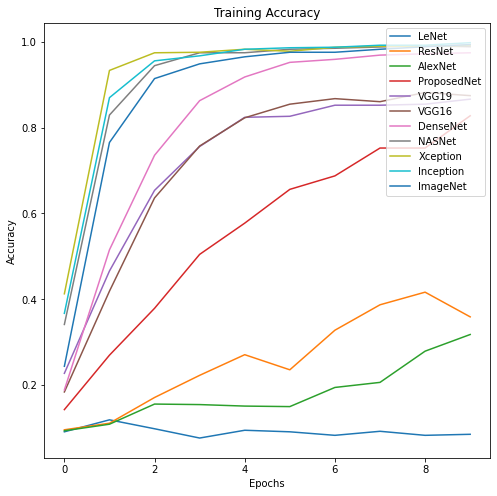

In [ ]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, LeNethist['accuracy'], label='LeNet')
plt.plot(epochs_range, ResNethist['accuracy'], label='ResNet')
plt.plot(epochs_range, AlexNethist['accuracy'], label='AlexNet')
plt.plot(epochs_range, Pmodelhist['accuracy'], label='ProposedNet')
plt.plot(epochs_range, VGG19hist['accuracy'], label='VGG19')
plt.plot(epochs_range, VGG16hist['accuracy'], label='VGG16')
plt.plot(epochs_range, DenseNethist['accuracy'], label='DenseNet')
plt.plot(epochs_range, NASNethist['accuracy'], label='NASNet')
plt.plot(epochs_range, Xceptionhist['accuracy'], label='Xception')
plt.plot(epochs_range, Inceptionhist['accuracy'], label='Inception')
plt.plot(epochs_range, ImageNethist['accuracy'], label='ImageNet')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training Accuracy')
plt.show()

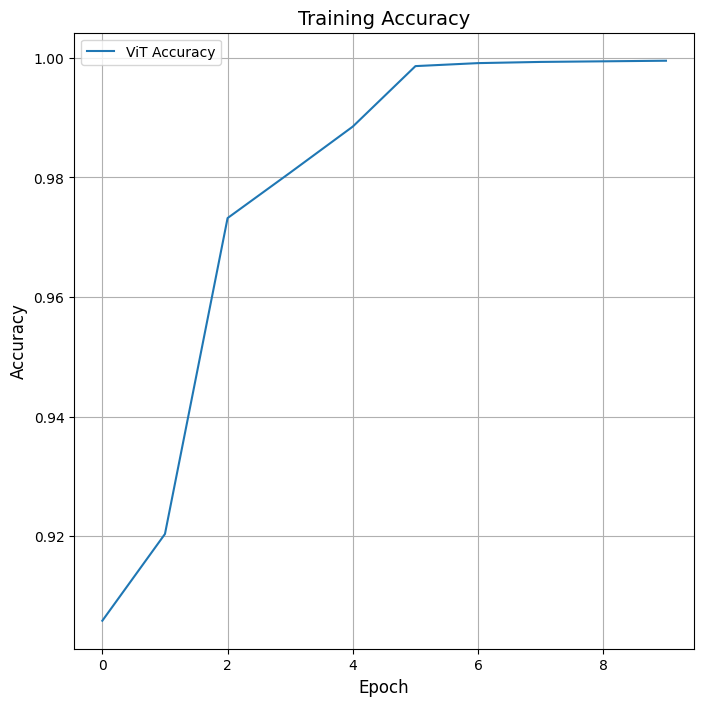

In [ ]:
# Plot training loss
import os
import numpy as np
import matplotlib.pyplot as plt
vitinsul={'loss': [0.0941,0.0796,0.0268,0.0192,0.0115,0.0014,0.0009,0.0007,0.0006,0.0005],'accuracy': [0.9059,0.9204,0.9732,0.9808,0.9885,0.9986,0.9991,0.9993,0.9994,0.9995]}
epochs_range = range(10)
plt.figure(figsize=(8,8))
plt.plot(epochs_range, vitinsul['accuracy'], label='ViT Accuracy')
plt.title('Training Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc="upper left")
plt.grid()
plt.show()

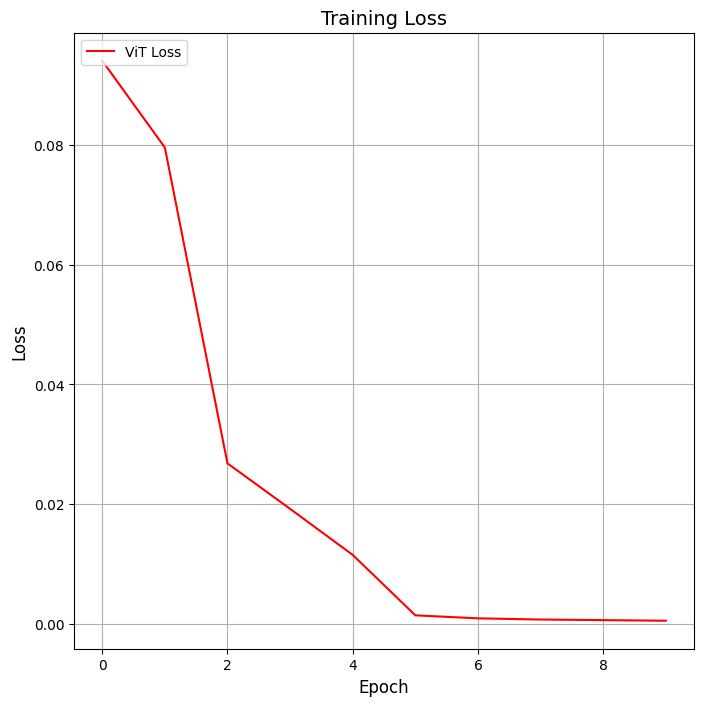

In [ ]:
epochs_range = range(10)
plt.figure(figsize=(8,8))
plt.plot(epochs_range, vitinsul['loss'], label='ViT Loss',color='red')
plt.title('Training Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc="upper left")
plt.grid()
plt.show()